In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d


In [2]:
H = 15240
V = 26.822
mass = 100
r = 0.2
areaB = 4*np.pi*r**2


In [3]:
# def dy_dt(y,t,m,n,vw):
#     y1,y2,y3,y4 = y
#     dydt = [y2, n*(y2+vw)*np.sqrt((y2+vw)**2+y4**2), y4,m+n*y4*np.sqrt((y2+vw)**2+y4**2)]
#     return dydt
# def dy_dt(y,time,m,n,vw):
#     y1, y2, y3, y4 = y
#     dydt = [y2, m*(y2+vw)*np.sqrt((y2+vw)**2+y4**2), y4,n+m*y4*np.sqrt((y2+vw)**2+y4**2)]
#     return dydt

def dy_dt(y, time, a, b, vw):
    y1, y2, y3, y4 = y
    dydt = [y2, b*(y2+vw)*np.sqrt((y2+vw)**2+y4**2), y4, a+b*y4*np.sqrt((y2+vw)**2+y4**2)]
    return dydt

In [4]:
# drag = 0.47
# crossArea = np.pi*r**2
# g = 9.81
# ro = 1
# m = -9.81
# n = -(0.5*drag*ro*crossArea)/mass
Cd = 0.47
vsh = 80
vw = 60*0.44704
A = np.pi*r**2  # ball's cross-section area in m**2

g = 9.8  # the gravitational accelation on the surface of Earth (in m/s**2)
rhoa = 1.  # the air density (in kg/m**3)

c2 = 0.5*Cd*rhoa*A

# the coefficients in the ODEs
a = -g
b = -c2/mass

In [5]:
#initial conditions

ti = 0.
tf =- 100.
time = np.linspace(ti,tf,10000)
velocity = np.linspace(79,82,10)
y0 = [0.0,vsh,H,0]


In [6]:
# for i in range(len(velocity)):
#     vsh = velocity[i]
    
#     y0 = [0.0,vsh,H,0] # for x,vx,y,vy

#     sol = odeint(dy_dt,y0,time,args=(a,b,vw))

#     h = sol[1,2]
#     k = 0
#     while h > 0.:
#         k += 1
#         h = sol[k,2]
    
#     k = k+10
#     fx = interp1d(sol[1:-1,2],sol[1:-1,0])
#     ft  =interp1d(sol[1:-1,2],time[1:-1])
#     x_h = ft(0)*vsh

for ia in range (len(velocity)):
    vsh = velocity[ia]
    y0 = [0.0, vsh,H, 0]
    sol = odeint(dy_dt, y0, time, args=(a, b, vw))
    h = sol[1,2]
    k = 0
    while h > 0.:
        k += 1
        h = sol[k,2]
    k = k+10
    
    fx = interp1d(sol[1:-1,2],sol[1:-1,0])
    ft = interp1d(sol[1:-1,2],time[1:-1])
    xsh = ft(0.)*vsh
    print(velocity[ia],fx(0.))
    




79.0 0.0
79.33333333333333 0.0
79.66666666666667 0.0
80.0 0.0
80.33333333333333 0.0
80.66666666666667 0.0
81.0 0.0
81.33333333333333 0.0
81.66666666666667 0.0
82.0 0.0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [7]:
sol = odeint(dy_dt,y0,time,args=(a,b,vw))

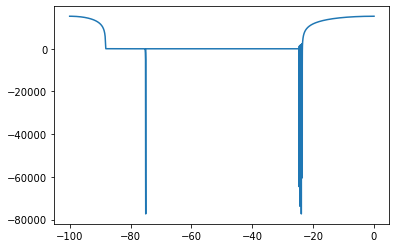

In [11]:
plt.plot(time[0:],sol[0:,2])


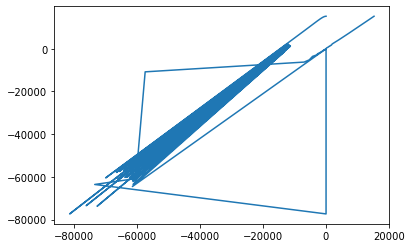

In [12]:
plt.plot(sol[0:,0],sol[0:,2])

In [13]:
# vel = np.linspace(73,87,50) # with wind
# for ia in range (len(vel)):
#     vsh = vel[ia]
#     y0 = [0.0, vsh,H, 0]
#     sol = odeint(dy_dt, y0, time, args=(a, b, vw))
#     h = sol[1,2]
#     k = 0
#     while h > 0.:
#         k += 1
#         h = sol[k,2]
#     k = k+10
    
#     fx = interp1d(sol[1:-1,2],sol[1:-1,0])
#     ft = interp1d(sol[1:-1,2],time[1:-1])
#     xsh = ft(0.)*vsh
    
    

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:684: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]
